# Network Notes

In [481]:
# good 160 unit *3 network
network_model = "d2-3200-v1-1-1"
iter1 = 200
iter2 = 600
codec = 3200
'''
network_model = "tale-prog-large3dense5"
iter1 = 5
iter2 = 50

network_model = "tale-prog-large3dense6"
iter1 = 5
iter2 = 30

network_model = "tale-prog-large3alt1"
iter1 = 5 #good
iter2 = 110

network_model = "tale-prog-quick2"
iter1 = 55
iter2 = 340
'''
# full set of 320 unit *3 network
#network_model = "tale-prog-stateful8l"
#iter1 = 500
#iter2 = 505

#network_model = "tale-prog-lg123alt"
#iter1 = 5
#iter2 = 55

from subprocess import check_output, call

import os
import json

home = os.environ.get('HOME')
if codec==3200:
    codec_sub = '-3200'
else:
    codec_sub = ''

os.chdir(home + "/store/c2gen/notebooks")


cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])
cb = home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)
call(["bash", home + "/store/c2gen/c2towav.sh", cb ])

import network_data as nd
from IPython.display import display, Markdown, Audio, Image
nh = home + "/store/c2gen/out/"+network_model+"/log"
    
if os.path.isfile(nh):
  with open(nh) as f:
      res = f.readlines()
      print(str.join("",res[-12:]))

  try:
    res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup/"+network_model+".out"])
  except:
    try:
      res = check_output(["tail", '-n 1', home + "/store/c2gen/nohup-"+network_model+".out"])
    except:
      res = ''
  if res != '':  
    res = str(res).replace('\\n', "\n")
    res = str(res).replace('\\r', "\n")
    res = str(res).replace('\\x08', "")
    res = res.split("\n")[-1]
    print(res)



number of frame sequences: 24225 
creating new model 
Defining model 
Stateful: False 
generate_len: None 
Training Iteration 610 
Make all lstms trainable 
Compiling model 
frame rotate: 0 
from frame: 0 
to frame: 12113 
starting model fit with frames: 12113 

 3500/12113 [=======>......................] - ETA: 98s - loss: 8.3245'


In [482]:
with open(home + "/store/c2gen/out/"+network_model+"/config.json") as f:
    j = json.load(f)
    for k,v in j.items():
        print(k,": ",v) 


limit_frames :  12113
start_iteration :  610
stateful :  False
num_iterations :  1200
fit_batch_size :  100
save_model_every_nth :  10
gen_every_nth :  10
model_filename :  out/d2-3200-v1-1-1/model-600.h5
test_data_fn :  test/criticalpracticalreason.c2-3200
learn_next_step :  True
frame_prop_loss_scale :  [1, 127, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31]
shuffle :  False
optimizer :  {'params': {}, 'name': 'RMSprop'}
seed_seq_len :  200
frame_seq_len :  200
seq_step :  200
framelen :  13
generate_len :  200


In [483]:
try:
  with open('./networks/' + network_model + '_notes.md', 'r') as fh:
    display(Markdown(fh.read()))
    
except:
    print("no markdown file found")

no markdown file found


In [484]:
nd.model_config(network_model)

lstm_1 : LSTM
trainable?  False
160 units
tanh activation
0.0 dropout
stateful False

lstm_2 : LSTM
trainable?  False
160 units
tanh activation
0.0 dropout
stateful False

lstm_3 : LSTM
trainable?  False
160 units
tanh activation
0.0 dropout
stateful False

lstm_4 : LSTM
trainable?  True
160 units
tanh activation
0.0 dropout
stateful False

lstm_5 : LSTM
trainable?  False
160 units
tanh activation
0.0 dropout
stateful False

dense_1 : Dense
trainable?  True
13 units
relu activation
 dropout
stateful 



Early Iterations
===

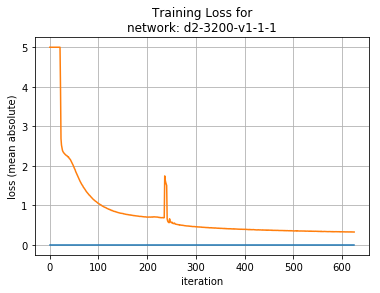

In [485]:
nd.plot_training_loss(network_model)

In [486]:
with open(home + "/store/c2gen/out/"+network_model+"/training.log") as f:
    print(str.join("",f.readlines()[-10:]))

with open(home + "/store/c2gen/out/"+network_model+"/iteration_counter") as f:
    print(f.read())

0,0.328248576287
0,0.327827647262
0,0.33085764166
0,0.326412023488
0,0.329521940725
0,0.326929436005
0,0.32807199342
0,0.326361210133
0,0.326144490205
0,0.326575709788

610


3200 rate codec



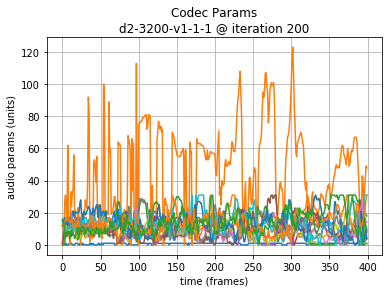

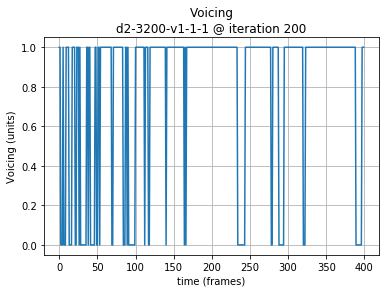

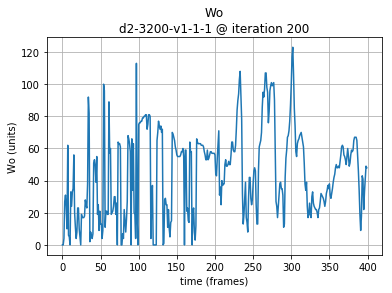

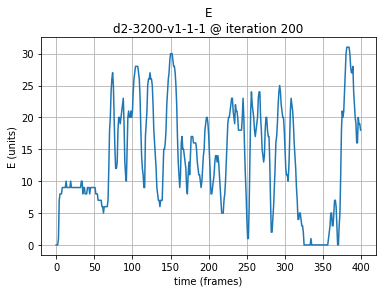

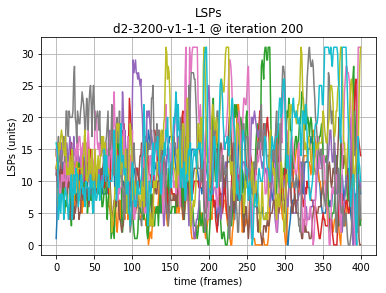

In [487]:
nd.plot_codec_params(network_model,iter1, scale_up='orig')
nd.plot_spec_params(network_model,iter1, params='Voicing')
nd.plot_spec_params(network_model,iter1, params='Wo')
nd.plot_spec_params(network_model,iter1, params='E')
nd.plot_spec_params(network_model,iter1, params='LSPs')

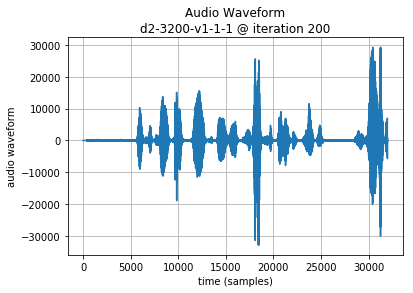

In [488]:
nd.plot_audio_waveform(network_model, iter1)

Listen to the WAV file

In [489]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter1)+codec_sub+".wav"))

Later Iterations
===

3200 rate codec



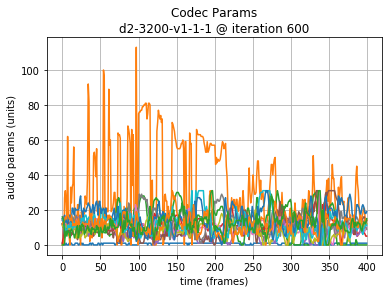

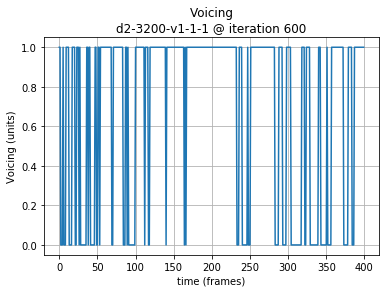

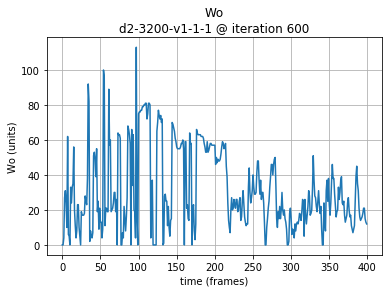

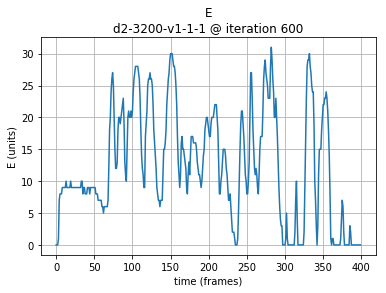

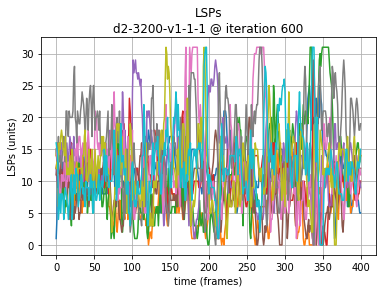

In [490]:
nd.plot_codec_params(network_model,iter2, scale_up=True)
nd.plot_spec_params(network_model,iter2, params='Voicing')
nd.plot_spec_params(network_model,iter2, params='Wo')
nd.plot_spec_params(network_model,iter2, params='E')
nd.plot_spec_params(network_model,iter2, params='LSPs')

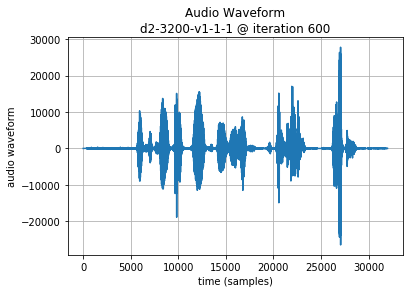

In [491]:
nd.plot_audio_waveform(network_model, iter2)

Listen to the WAV file

In [492]:
display(Audio(filename=home + "/store/c2gen/out/"+network_model+"/out-c2cb-"+str(iter2)+codec_sub+".wav"))